In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("team_performance_dataset_2008to2024.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
df.head()


Dataset Shape: (1073, 18)
Columns: Index(['Match_ID', 'Date', 'Teams', 'Venue', 'Toss_Winner', 'Toss_Decision',
       'Match_Winner', 'Win_Type', 'Win_Margin', 'First_Innings_Score',
       'Second_Innings_Score', 'Player_of_Match', 'Umpire', 'Umpire1',
       'Umpire2', 'Powerplay_Scores', 'Middle_Overs_Scores',
       'Death_Overs_Scores'],
      dtype='object')


,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


In [3]:
# Step 2: Preprocessing

# Drop irrelevant columns (not useful for prediction)
df_clean = df.drop(columns=["Match_ID", "Date", "Player_of_Match", "Umpire", "Umpire1", "Umpire2"])

# Handle missing values (if any)
df_clean = df_clean.dropna()

# Separate features and target
X = df_clean.drop(columns=["Match_Winner"])
y = df_clean["Match_Winner"]

# Encode categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Final Feature Shape:", X.shape)
print("Target shape:", y.shape)


Final Feature Shape: (1054, 11)
Target shape: (1054,)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.236967   0.180083  0.236967  0.198318
1        Random Forest  0.535545   0.490796  0.535545  0.507660
2              XGBoost  0.654028   0.641448  0.654028  0.643343


<Figure size 1000x600 with 0 Axes>

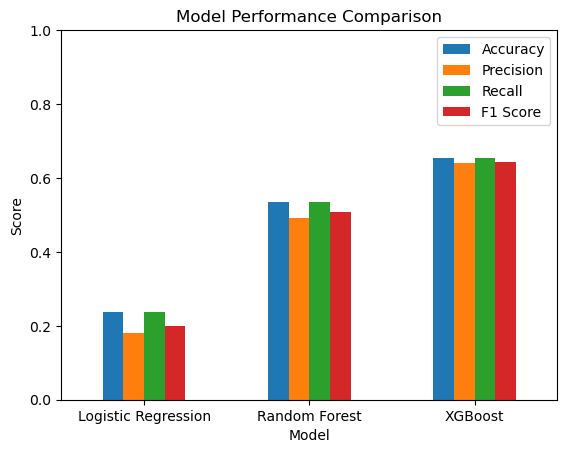

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Calculate metrics for each model
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average="weighted", zero_division=0)
    }

results = []
results.append(get_metrics(y_test, y_pred_lr, "Logistic Regression"))
results.append(get_metrics(y_test, y_pred_rf, "Random Forest"))
results.append(get_metrics(y_test, y_pred_xgb, "XGBoost"))

# Create DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot Comparison
plt.figure(figsize=(10,6))
results_df.set_index("Model")[["Accuracy","Precision","Recall","F1 Score"]].plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()
